Nama: Timotius Haniel

Username Dicoding: https://www.dicoding.com/users/timotiushaniel186

Domisili Asal: Bandung, Jawa Barat

Pekerjaan: Mahasiswa Institut Teknologi Harapan Bangsa, Bandung

In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os

print(tf.__version__)
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

2.3.0
Found GPU at: /device:GPU:0


**Men-download dataset dalam bentuk zip**

In [2]:
# melakukan download file dalam bentuk zip
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-10-24 17:17:12--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  5.23MB/s    in 46s     

2020-10-24 17:17:59 (6.69 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



**Meng-ekstrak file zip data set**

In [3]:
import zipfile

local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

**Membuat split data set menjadi train dan validation, lalu membuat direktori split data set tersebut**

In [4]:
# Membuat folder untuk dataset
base_dir = '/tmp/rockpaperscissors'
dataset = os.path.join(base_dir,'dataset')

os.mkdir(dataset)

In [5]:
# Split dataset menjadi train dir dan validation dir
base_dir = '/tmp/rockpaperscissors/dataset'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')

os.mkdir(train_dir)
os.mkdir(validation_dir)

In [6]:
# Membuat split untuk tipe dataset train dan validation untuk setiap kategori rock, paper, dan scissors
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')

val_rock = os.path.join(validation_dir, 'rock')
val_paper = os.path.join(validation_dir, 'paper')
val_scissors = os.path.join(validation_dir, 'scissors')

In [7]:
# Membuat folder untuk split data yang telah dibuat untuk setiap kategori rock, paper, dan scissors
os.mkdir(train_rock)
os.mkdir(train_paper)
os.mkdir(train_scissors)

os.mkdir(val_rock)
os.mkdir(val_paper)
os.mkdir(val_scissors)

**Menghitung list foto pada direktori untuk setiap kategori rock, paper, dan scissors**

In [8]:
#Rock
len(os.listdir('/tmp/rockpaperscissors/rock'))

726

In [9]:
#Paper
len(os.listdir('/tmp/rockpaperscissors/paper'))

712

In [10]:
#Scissors
len(os.listdir('/tmp/rockpaperscissors/scissors'))

750

**Memecah direktori rock, paper, dan scissors menjadi data train dan data validation sebesar 40% dari total data set**

In [11]:
base_dir = '/tmp/rockpaperscissors'

rock_dir = os.path.join(base_dir,'rock')
paper_dir = os.path.join(base_dir,'paper')
scissors_dir = os.path.join(base_dir,'scissors')

In [12]:
# Rock
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.40)

# Paper
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.40)

# Scissors
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.40)

In [13]:
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')

val_rock = os.path.join(validation_dir, 'rock')
val_paper = os.path.join(validation_dir, 'paper')
val_scissors = os.path.join(validation_dir, 'scissors')

**Meng-copy data train dan data validation ke directory dataset (direktori baru)**

In [14]:
import shutil

for file in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, file), os.path.join(train_rock, file))
for file in train_paper_dir:
  shutil.copy(os.path.join(paper_dir,file), os.path.join(train_paper,file))
for file in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,file), os.path.join(train_scissors,file))
for file in val_rock_dir:
  shutil.copy(os.path.join(rock_dir, file), os.path.join(val_rock,file))
for file in val_paper_dir:
  shutil.copy(os.path.join(paper_dir,file), os.path.join(val_paper,file))
for file in val_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,file), os.path.join(val_scissors,file))

**Menghitung list foto pada direktori train data untuk setiap kategori rock, paper, dan scissors**

In [15]:
#Rock (Train Data)
len(os.listdir('/tmp/rockpaperscissors/dataset/train/rock'))

435

In [16]:
#Paper (Train Data)
len(os.listdir('/tmp/rockpaperscissors/dataset/train/paper'))

427

In [17]:
#Scissors (Train Data)
len(os.listdir('/tmp/rockpaperscissors/dataset/train/scissors'))

450

**Menghitung list foto pada direktori validation data untuk setiap kategori rock, paper, dan scissors**

In [18]:
#Rock (Validation Data)
len(os.listdir('/tmp/rockpaperscissors/dataset/val/rock'))

291

In [19]:
#Paper (Validation Data)
len(os.listdir('/tmp/rockpaperscissors/dataset/val/paper'))

285

In [20]:
#Scissors (Validation Data)
len(os.listdir('/tmp/rockpaperscissors/dataset/val/scissors'))

300

**Mengimplementasikan augmentasi gambar untuk menggambarkan data-data baru dari datasets**

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    vertical_flip = True,
                    zoom_range = 0.2,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    vertical_flip = True,
                    zoom_range = 0.2,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

**Mengimplementasikan image data generator untuk menyiapkan data latih yang digunakan oleh model untuk dipelajari**

In [22]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 256x256 piksel
        batch_size=32,
        # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='categorical',
        seed=39)
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 256x256 piksel
        batch_size=32, # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='categorical',
        seed=39)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


**Membangun arsitektur Convolutional Neural Network untuk mempercepat proses pelatihan Muti Layer Perceptron**

In [23]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [24]:
# Data Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [25]:
# compile model dengan 'adam' optimizer loss function 'categorical_crossentropy' 
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy', 'mean_absolute_error'])

**Melatih model dengan model fi dengan menggunakan Callback (Menghentikan training setelah akurasi melebihi 96 %)**

In [26]:
# Penggunaan Callback untuk menghindari overfitting dan menghentikan data training apabila akurasi telah melebihi 98 %
class callbackClass(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.98) and (logs.get('val_accuracy') > 0.98):
      print("\nAkurasi sudah mencukupi (melebihi 98%), Stop Data Training!")
      print(
            "Average Loss pada epoch {} adalah {:7.2f} "
            "& Mean Absolute Error nya adalah {:7.2f}.".format(
                epoch, logs["loss"], logs["mean_absolute_error"]
            )
        )
      self.model.stop_training = True

In [27]:
dataModelHistory = model.fit(
    train_generator,
    steps_per_epoch = 40, # Total batch yang dieksekusi pada setiap epoch
    epochs = 30, # Tambahkan nilai epochs jika akurasi model belum sesuai dengan yang diinginkan
    validation_data = validation_generator, # Menampilkan akurasi pengujian data yang sudah divalidasi
    validation_steps = 20, # Total Batch yang dieksekusi pada setiap epoch
    verbose = 2,
    callbacks=[callbackClass()]
)


Epoch 1/30
40/40 - 14s - loss: 1.0094 - accuracy: 0.4648 - mean_absolute_error: 0.4059 - val_loss: 0.8628 - val_accuracy: 0.5562 - val_mean_absolute_error: 0.3230
Epoch 2/30
40/40 - 13s - loss: 0.5880 - accuracy: 0.7789 - mean_absolute_error: 0.2240 - val_loss: 0.3149 - val_accuracy: 0.8859 - val_mean_absolute_error: 0.1228
Epoch 3/30
40/40 - 13s - loss: 0.3391 - accuracy: 0.8734 - mean_absolute_error: 0.1322 - val_loss: 0.1929 - val_accuracy: 0.9266 - val_mean_absolute_error: 0.0851
Epoch 4/30
40/40 - 13s - loss: 0.2476 - accuracy: 0.9094 - mean_absolute_error: 0.0935 - val_loss: 0.1862 - val_accuracy: 0.9469 - val_mean_absolute_error: 0.0749
Epoch 5/30
40/40 - 13s - loss: 0.1856 - accuracy: 0.9375 - mean_absolute_error: 0.0713 - val_loss: 0.1256 - val_accuracy: 0.9594 - val_mean_absolute_error: 0.0529
Epoch 6/30
40/40 - 13s - loss: 0.1541 - accuracy: 0.9445 - mean_absolute_error: 0.0579 - val_loss: 0.1418 - val_accuracy: 0.9594 - val_mean_absolute_error: 0.0532
Epoch 7/30
40/40 - 13s

**Gambar / Plot Model Accuracy, Model Loss, dan Mean Absolute Error dari Training Data and Validation Data**

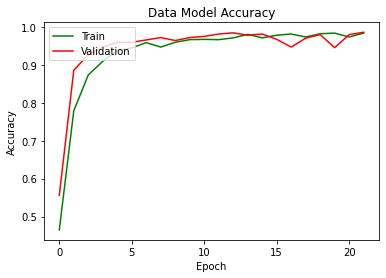

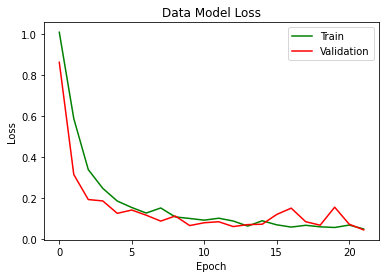

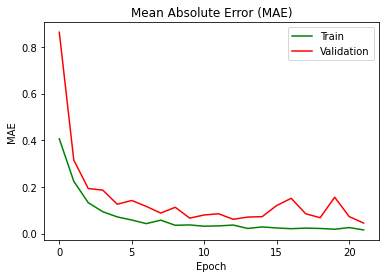

In [28]:
import matplotlib.pyplot as plt

#Model Accuracy Ploting
accuracy = dataModelHistory.history['accuracy']
validationAccuracy = dataModelHistory.history['val_accuracy']

plt.figure()
plt.plot(accuracy, color='green')
plt.plot(validationAccuracy, color='red')
plt.title('Data Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#Model Loss Plotting
loss = dataModelHistory.history['loss']
validationLoss = dataModelHistory.history['val_loss']

plt.figure()
plt.plot(loss, color='green')
plt.plot(validationLoss, color='red')
plt.title('Data Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

#Mean Absolute Error Plotting
meanAbsError = dataModelHistory.history['mean_absolute_error']
valMeanAbsError = dataModelHistory.history['val_loss']

plt.figure()
plt.plot(meanAbsError, color='green')
plt.plot(valMeanAbsError, color='red')
plt.title('Mean Absolute Error (MAE)')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

Saving 2gd0aqAxW55bHZP9.png to 2gd0aqAxW55bHZP9.png
Scissors


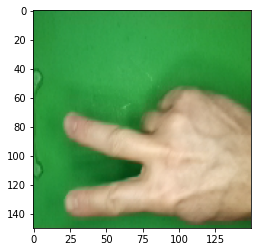

In [44]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploadedData = files.upload()
 
for data in uploadedData.keys():
  # predicting images
  path = data
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  pics = np.vstack([x])
  classes = model.predict(pics, batch_size=32)

  if classes[0,0]!=0:
    print('Paper')
  elif classes[0,1]!=0:
    print('Rock')
  elif classes[0,2]!=0:
    print('Scissors')
  else:
    print("Klasifikasi Gambar tidak dikenali")